In [3]:
import pandas as pd

In [6]:

import os

# Directory containing your Excel files
folder_path = "C:\\Users\\loges\\Downloads\\regions_of_interest"

# List all Excel files in the directory
excel_files = [f for f in os.listdir(folder_path) if f.endswith('.xlsx') or f.endswith('.xls')]

# Initialize an empty list to store individual dataframes
dfs = []

# Iterate through each file and append its content to the dfs list
for file in excel_files:
    file_path = os.path.join(folder_path, file)
    dfs.append(pd.read_excel(file_path, engine='openpyxl'))

# Concatenate all the dataframes into a single dataframe
final_df = pd.concat(dfs, ignore_index=True)


In [7]:
final_df.shape

(24651, 117)

In [10]:
import pandas as pd

# Example dataframe structure
df_label = pd.read_excel(r'C:\Users\loges\OneDrive - University of Sussex\Desktop\frog_audio\frogId_label_noise.xlsx', sheet_name="Sheet2")

df_label.head()

,File No,Rhinella marina,Pristimantis achatinus,Hysiboas boans,Pristimantis subsigillatus,Pristimantis labiosus,Barycholos pulcher,Rhaebo haematiticus,Hypsiboas rosenbergi,Smilisca phaeota,Pristimantis walkeri,Espadarrana prosoblepon,Hyalinobatrahium aureoguttatum,Hyalinobatrachium fleischmanni,Hyalinobatrachium chirripoi,Hypsiboas picturatus,Epipedobates boulengeri,Hyloxalus toachi,Teratohyla spinosa
0,1,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0.0,0
1,2,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0.0,0
2,3,0.0,2,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0.0,0
3,4,0.0,0,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0.0,0
4,5,0.0,4,0.0,0.0,0,0.0,0.0,0,0,0,0,0,0.0,0,0,0,0.0,0


In [11]:
label_columns = [col for col in df_label.columns if col != 'File No']
print(label_columns)
# Initialize an empty dictionary to store the matrix-like representation
label_to_number = {label: index + 1 for index, label in enumerate(label_columns)}
label_to_number

['Rhinella marina', 'Pristimantis achatinus', 'Hysiboas boans', 'Pristimantis subsigillatus', 'Pristimantis labiosus', 'Barycholos pulcher', 'Rhaebo haematiticus', 'Hypsiboas rosenbergi', 'Smilisca phaeota', 'Pristimantis walkeri', 'Espadarrana prosoblepon', 'Hyalinobatrahium aureoguttatum', 'Hyalinobatrachium fleischmanni', 'Hyalinobatrachium chirripoi', 'Hypsiboas picturatus', 'Epipedobates boulengeri', 'Hyloxalus toachi', 'Teratohyla spinosa']


{'Rhinella marina': 1,
 'Pristimantis achatinus': 2,
 'Hysiboas boans': 3,
 'Pristimantis subsigillatus': 4,
 'Pristimantis labiosus': 5,
 'Barycholos pulcher': 6,
 'Rhaebo haematiticus': 7,
 'Hypsiboas rosenbergi': 8,
 'Smilisca phaeota': 9,
 'Pristimantis walkeri': 10,
 'Espadarrana prosoblepon': 11,
 'Hyalinobatrahium aureoguttatum': 12,
 'Hyalinobatrachium fleischmanni': 13,
 'Hyalinobatrachium chirripoi': 14,
 'Hypsiboas picturatus': 15,
 'Epipedobates boulengeri': 16,
 'Hyloxalus toachi': 17,
 'Teratohyla spinosa': 18}

In [12]:
matrix_data={}
# Iterate through each row in the dataframe
for index, row in df_label.iterrows():
    filename = row['File No']
    labels = [label_to_number[col] for col in label_columns if row[col] >0]
    matrix_data[ str(int(filename)) + ".wav" ] = labels

# Create a new dataframe from the matrix data
matrix_df = pd.DataFrame.from_dict(matrix_data, orient='index')

# Fill NaN values with 0
matrix_df.fillna(0, inplace=True)

In [13]:
matrix_df= matrix_df.rename_axis("filename")

In [14]:
matrix_df

,0,1,2,3,4,5
filename,,,,,,
1.wav,0.0,0.0,0.0,0.0,0.0,0.0
2.wav,0.0,0.0,0.0,0.0,0.0,0.0
3.wav,2.0,0.0,0.0,0.0,0.0,0.0
4.wav,0.0,0.0,0.0,0.0,0.0,0.0
5.wav,2.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2696.wav,0.0,0.0,0.0,0.0,0.0,0.0
2697.wav,0.0,0.0,0.0,0.0,0.0,0.0
2698.wav,4.0,0.0,0.0,0.0,0.0,0.0


In [15]:
mask = (matrix_df[0] != 0) & (matrix_df.drop(0, axis=1) == 0).all(axis=1)

In [16]:
filtered_df = matrix_df[mask]


In [17]:
columns_to_drop = [1,2,3,4,5]
filtered_df.drop(columns_to_drop, axis=1, inplace=True)

C:\Users\loges\AppData\Local\Temp\ipykernel_24072\772494192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(columns_to_drop, axis=1, inplace=True)


In [18]:
filtered_df

,0
filename,
3.wav,2.0
5.wav,2.0
9.wav,5.0
11.wav,4.0
12.wav,2.0
...,...
2692.wav,5.0
2694.wav,2.0
2695.wav,3.0


In [19]:
merged_features = final_df.merge(filtered_df, on='filename', how='left')
merged_features = merged_features.rename (columns = { 0 :"label"})
merged_features["label"].fillna(-1, inplace = True) 

In [ ]:
# merged_features.to_excel("C:\\Users\\lv228\\Downloads\\machine.xlsx" ,index=False,engine='openpyxl')

In [20]:
merged_features["label"].value_counts()

-1.0     16534
 2.0      5166
 5.0      1420
 4.0       414
 3.0       396
 16.0      215
 6.0       194
 1.0       155
 7.0        75
 14.0       30
 13.0       18
 15.0       15
 17.0       12
 8.0         4
 10.0        3
Name: label, dtype: int64

In [31]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import plotly.express as px

features = merged_features.iloc[:, :-2]
labels = merged_features.iloc[:, -1]

# It's important to scale the data before applying PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Apply PCA
# The number of components can be set based on the variance you wish to retain
# For demonstration purposes, let's say you want to reduce it to 50 components
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(scaled_data)

pc_df = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3'])

# Append labels to the reduced dimensions
pc_df['Label'] = labels
# Mark unlabeled data as "Unlabeled" for visualization purposes
pc_df['Label'] = pc_df['Label'].replace(-1, "Unlabeled")

# Visualize using Plotly
fig = px.scatter_3d(pc_df, x='PC1', y='PC2', z='PC3', color='Label', opacity=0.7)

# Set the theme and show the plot
fig.update_layout(title='3D visualization of Labeled and Unlabeled Data')
fig.show()

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
# Split data into features and labels
X = merged_features.iloc[:, :-2]
y = merged_features.iloc[:, -1]

# Split the data into labeled and unlabeled datasets
X_labeled, X_unlabeled = X[y != -1], X[y == -1]
y_labeled = y[y != -1]



# Initialize the encoder
encoder = LabelEncoder()

# Fit the encoder and transform y
y_encoded = encoder.fit_transform(y_labeled)

# Now use y_encoded in place of y for training and testing

# Split labeled data for training and evaluation
X_train, X_test, y_train, y_test = train_test_split(X_labeled, y_encoded, test_size=0.2, random_state=42)



In [37]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix , accuracy_score



def benchmark(clf, custom_name=False):
    print("_" * 80)
    print("Training: ")
    print(clf)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    score = accuracy_score(y_test, pred)
    print(f"accuracy:   {score:.3}")
    conf_matrix = confusion_matrix(y_test, pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    if custom_name:
        clf_descr = str(custom_name)
    else:
        clf_descr = clf.__class__.__name__
    
    return clf_descr,score, conf_matrix


In [59]:

results = []
for clf, name in (
    (KNeighborsClassifier(n_neighbors=10), "kNN"),
    (RandomForestClassifier(), "Random Forest"),
    (XGBClassifier(), "XGBoost"),

):
    print("=" * 80)
    print(name)
    results.append(benchmark(clf, name))

kNN
________________________________________________________________________________
Training: 
KNeighborsClassifier(n_neighbors=10)
accuracy:   0.686
Confusion Matrix:
[[  0  14   0   1  15   0   0   0   0   0   0   0   0]
 [  3 942  13   5  46   4   1   0   0   0   0   0   0]
 [  0  69   9   0   3   0   0   0   0   0   0   0   0]
 [  0  41   4   8  28   0   0   0   0   0   0   0   0]
 [  1 126   3   7 144   4   2   0   0   0   0   3   0]
 [  0  35   0   1   5   8   0   0   0   0   0   0   0]
 [  0   8   0   0  12   0   1   0   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0   0   0   0   0   0]
 [  0   1   3   0   0   0   0   0   0   0   0   0   0]
 [  0   5   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   3   0   0   0   0   0   0   0   0]
 [  1  39   0   0   0   0   0   0   0   0   0   2   0]
 [  0   1   0   0   1   1   0   0   0   0   0   0   0]]
Random Forest
________________________________________________________________________________
Training: 
RandomFor

In [41]:
class_labels=[]
available_labels = [1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0,13.0,14.0,15.0,16.0,17.0]

def get_key_from_value(my_dict, target_value):
    for key, value in my_dict.items():
        if value == target_value:
            return key
    return None
class_labels = [get_key_from_value(label_to_number,value) for  value in available_labels]
class_labels

['Rhinella marina',
 'Pristimantis achatinus',
 'Hysiboas boans',
 'Pristimantis subsigillatus',
 'Pristimantis labiosus',
 'Barycholos pulcher',
 'Rhaebo haematiticus',
 'Hypsiboas rosenbergi',
 'Pristimantis walkeri',
 'Hyalinobatrachium fleischmanni',
 'Hyalinobatrachium chirripoi',
 'Hypsiboas picturatus',
 'Epipedobates boulengeri',
 'Hyloxalus toachi']

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_confusion_matrix(classifier_name, cm, accuracy, class_labels):
    # Calculate precision, recall and f1 score for each class
    true_pos = np.diag(cm)
    false_pos = np.sum(cm, axis=0) - true_pos
    false_neg = np.sum(cm, axis=1) - true_pos
    
    # precision_per_class = true_pos / (true_pos + false_pos)
    # recall_per_class = true_pos / (true_pos + false_neg)
    # f1_per_class = 2 * (precision_per_class * recall_per_class) / (precision_per_class + recall_per_class)

    # Handle cases where true_pos + false_pos or true_pos + false_neg is 0
    precision_per_class = np.where((true_pos + false_pos) == 0, 0, true_pos / (true_pos + false_pos))
    recall_per_class = np.where((true_pos + false_neg) == 0, 0, true_pos / (true_pos + false_neg))
    f1_per_class = np.where((precision_per_class + recall_per_class) == 0, 0, 
                            2 * (precision_per_class * recall_per_class) / (precision_per_class + recall_per_class))
    
    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix for {classifier_name} \nAccuracy: {accuracy:.2f}')
    
    # Display precision, recall, f1 score table
    metrics_data = {'Precision': precision_per_class, 'Recall': recall_per_class, 'F1 Score': f1_per_class}
    metrics_df = pd.DataFrame(metrics_data, index=class_labels)
    print("\nMetrics for each class:")
    print(metrics_df)

    plt.show()

# Example usage
# cm = np.array([[5, 2], [1, 6]])
# plot_confusion_matrix("Test Classifier", cm, 0.85, ['Class 1', 'Class 2'])


kNN 0.6859605911330049

Metrics for each class:
                                Precision    Recall  F1 Score
Rhinella marina                  0.000000  0.000000  0.000000
Pristimantis achatinus           0.735363  0.928994  0.820915
Hysiboas boans                   0.272727  0.111111  0.157895
Pristimantis subsigillatus       0.363636  0.098765  0.155340
Pristimantis labiosus            0.560311  0.496552  0.526508
Barycholos pulcher               0.470588  0.163265  0.242424
Rhaebo haematiticus              0.250000  0.047619  0.080000
Hypsiboas rosenbergi             0.000000  0.000000  0.000000
Pristimantis walkeri             0.000000  0.000000  0.000000
Hyalinobatrachium fleischmanni   0.000000  0.000000  0.000000
Hyalinobatrachium chirripoi      0.000000  0.000000  0.000000
Hypsiboas picturatus             0.400000  0.047619  0.085106
Epipedobates boulengeri          0.000000  0.000000  0.000000


C:\Users\loges\AppData\Local\Temp\ipykernel_24072\884660844.py:17: RuntimeWarning:

invalid value encountered in divide

C:\Users\loges\AppData\Local\Temp\ipykernel_24072\884660844.py:20: RuntimeWarning:

invalid value encountered in divide



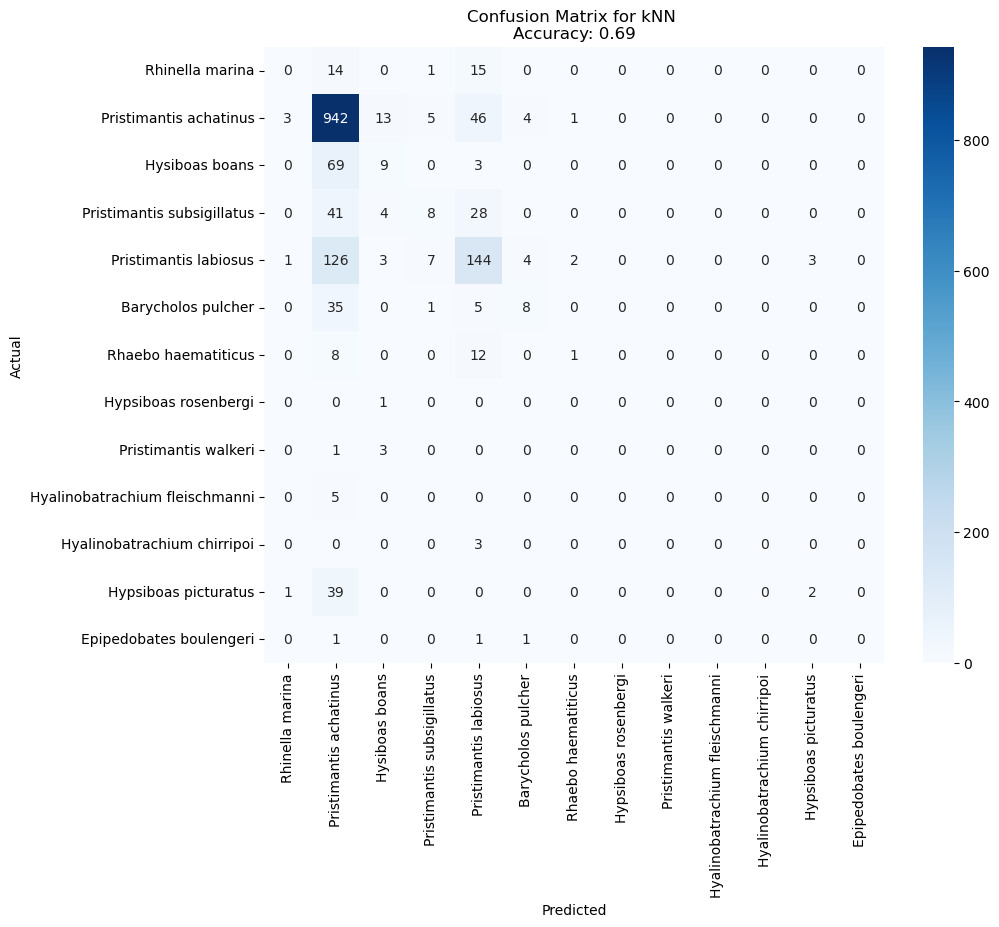

Random Forest 0.8528325123152709

Metrics for each class:
                                Precision    Recall  F1 Score
Rhinella marina                  1.000000  0.300000  0.461538
Pristimantis achatinus           0.856525  0.977318  0.912943
Hysiboas boans                   0.890625  0.703704  0.786207
Pristimantis subsigillatus       0.928571  0.481481  0.634146
Pristimantis labiosus            0.797251  0.800000  0.798623
Barycholos pulcher               0.892857  0.510204  0.649351
Rhaebo haematiticus              1.000000  0.476190  0.645161
Hypsiboas rosenbergi             0.000000  0.000000  0.000000
Pristimantis walkeri             1.000000  0.750000  0.857143
Hyalinobatrachium fleischmanni   1.000000  0.200000  0.333333
Hyalinobatrachium chirripoi      1.000000  1.000000  1.000000
Hypsiboas picturatus             0.937500  0.357143  0.517241
Epipedobates boulengeri          0.000000  0.000000  0.000000


C:\Users\loges\AppData\Local\Temp\ipykernel_24072\884660844.py:17: RuntimeWarning:

invalid value encountered in divide

C:\Users\loges\AppData\Local\Temp\ipykernel_24072\884660844.py:20: RuntimeWarning:

invalid value encountered in divide



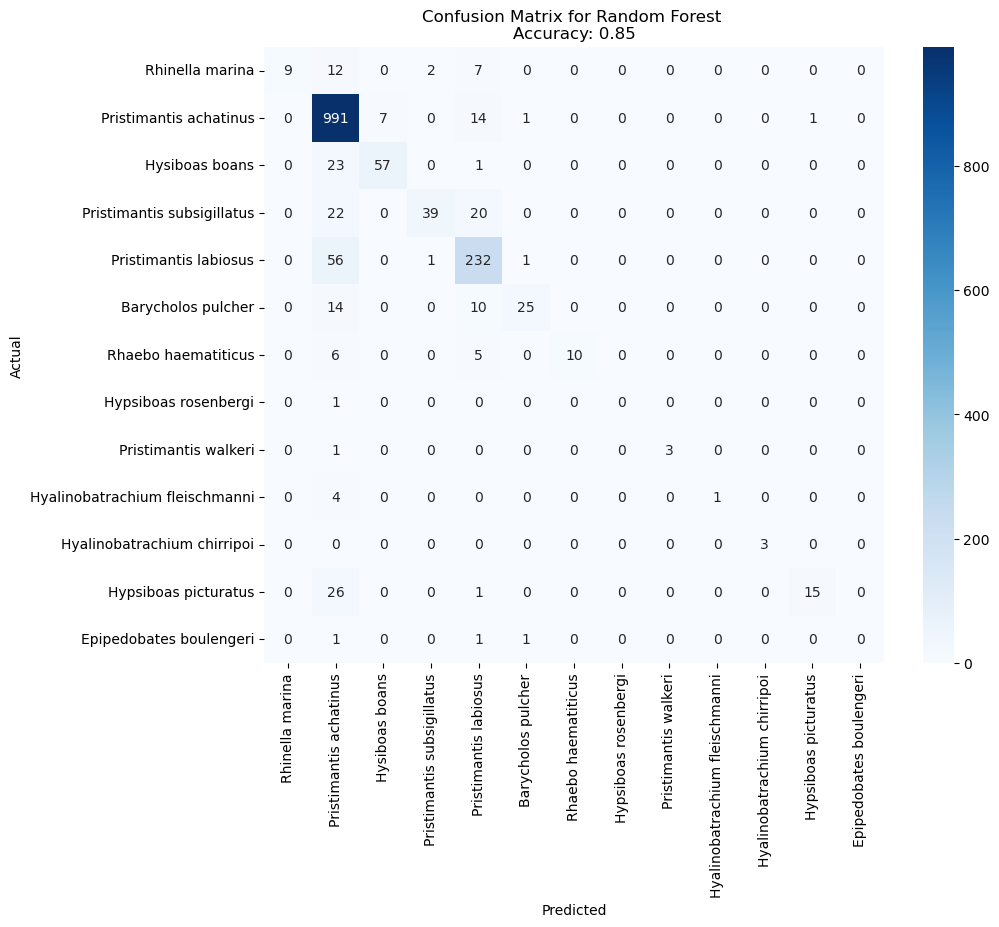

XGBoost 0.8860837438423645

Metrics for each class:
                                Precision    Recall  F1 Score
Rhinella marina                  0.947368  0.600000  0.734694
Pristimantis achatinus           0.903636  0.980276  0.940397
Hysiboas boans                   0.984127  0.765432  0.861111
Pristimantis subsigillatus       0.807018  0.567901  0.666667
Pristimantis labiosus            0.807818  0.855172  0.830821
Barycholos pulcher               0.861111  0.632653  0.729412
Rhaebo haematiticus              1.000000  0.476190  0.645161
Hypsiboas rosenbergi             0.000000  0.000000  0.000000
Pristimantis walkeri             1.000000  0.500000  0.666667
Hyalinobatrachium fleischmanni   1.000000  0.200000  0.333333
Hyalinobatrachium chirripoi      1.000000  1.000000  1.000000
Hypsiboas picturatus             0.923077  0.571429  0.705882
Epipedobates boulengeri          0.000000  0.000000  0.000000


C:\Users\loges\AppData\Local\Temp\ipykernel_24072\884660844.py:17: RuntimeWarning:

invalid value encountered in divide

C:\Users\loges\AppData\Local\Temp\ipykernel_24072\884660844.py:20: RuntimeWarning:

invalid value encountered in divide



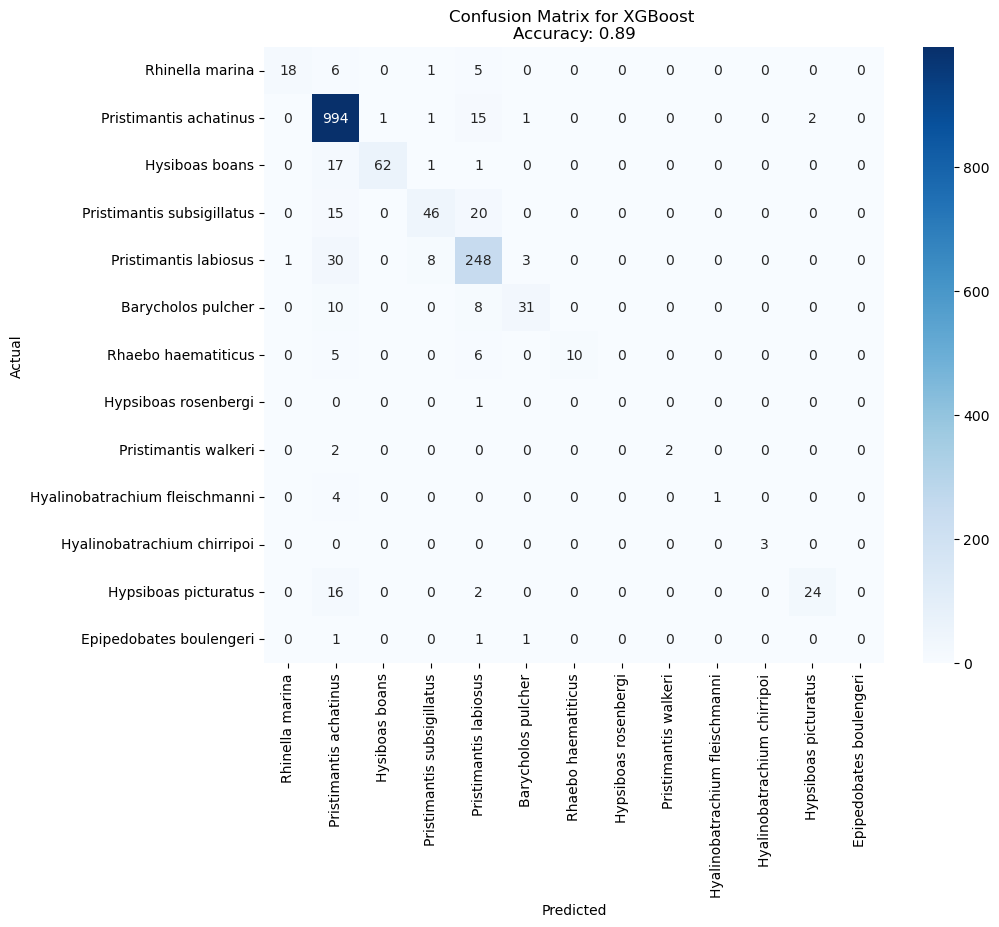

In [60]:
for classifier_result in results:
    name= classifier_result[0]
    accuracy = classifier_result[1]
    cm= classifier_result[2]
    print(name,accuracy)
    plot_confusion_matrix(name,cm,accuracy,class_labels[:len(cm[0])])

In [ ]:
# import numpy as np
# # Create a meshgrid for plotting boundaries
# h = .02  # step size in the mesh
# x_min, x_max = principalComponents[:, 0].min() - 1, principalComponents[:, 0].max() + 1
# y_min, y_max = principalComponents[:, 1].min() - 1, principalComponents[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# # Get predictions for each point in the meshgrid
# Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

# # Plot the boundaries
# plt.figure(figsize=(10, 6))
# plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
# plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=clusters, cmap='viridis', s=50)
# plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
# plt.xlabel('First Principal Component')
# plt.ylabel('Second Principal Component')
# plt.title('Clusters with Boundaries after PCA')
# plt.show()


In [68]:

# Split the data into labeled and unlabeled datasets
# X_labeled, X_unlabeled = X[y != -1], X[y == -1]
# y_labeled = y[y != -1]



# # Initialize the encoder
# encoder = LabelEncoder()

# # Fit the encoder and transform y
# y_encoded = encoder.fit_transform(y_labeled)

# # Now use y_encoded in place of y for training and testing

# # Split labeled data for training and evaluation
# X_train, X_test, y_train, y_test = train_test_split(X_labeled, y_encoded, test_size=0.2, random_state=42)


clf = XGBClassifier()
clf.fit(X_train, y_train)

# Predict class probabilities on unlabeled data
probs_unlabeled = clf.predict_proba(X_unlabeled)
# Take the max probability for each sample to determine confidence
max_probs = probs_unlabeled.max(axis=1)

# Define a threshold for confident predictions
threshold = 0.9
confident_samples = max_probs > threshold

# Pseudo labeling for confident predictions
pseudo_labels_confident = clf.predict(X_unlabeled[confident_samples])
y_train_series = pd.Series(y_train)
pseudo_labels_confident_series = pd.Series(pseudo_labels_confident, index=X_unlabeled[confident_samples].index)

# Combine labeled data and confident pseudo-labeled data
X_combined = pd.concat([X_train, X_unlabeled[confident_samples]])
y_combined = pd.concat([y_train_series, pseudo_labels_confident_series])


# Retrain model on combined data
clf.fit(X_combined, y_combined)

# Prediction & Evaluation
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with confident pseudo-labeling and XGBoost: {accuracy:.4f}")

Accuracy with confident pseudo-labeling and XGBoost: 0.8651


C:\Users\loges\AppData\Local\Temp\ipykernel_24072\884660844.py:17: RuntimeWarning:

invalid value encountered in divide

C:\Users\loges\AppData\Local\Temp\ipykernel_24072\884660844.py:20: RuntimeWarning:

invalid value encountered in divide




Metrics for each class:
                                Precision    Recall  F1 Score
Rhinella marina                  0.928571  0.433333  0.590909
Pristimantis achatinus           0.880425  0.980276  0.927671
Hysiboas boans                   0.937500  0.740741  0.827586
Pristimantis subsigillatus       0.825000  0.407407  0.545455
Pristimantis labiosus            0.778846  0.837931  0.807309
Barycholos pulcher               0.937500  0.612245  0.740741
Rhaebo haematiticus              1.000000  0.333333  0.500000
Hypsiboas rosenbergi             0.000000  0.000000  0.000000
Pristimantis walkeri             1.000000  0.250000  0.400000
Hyalinobatrachium fleischmanni   0.500000  0.200000  0.285714
Hyalinobatrachium chirripoi      1.000000  1.000000  1.000000
Hypsiboas picturatus             1.000000  0.476190  0.645161
Epipedobates boulengeri          0.000000  0.000000  0.000000


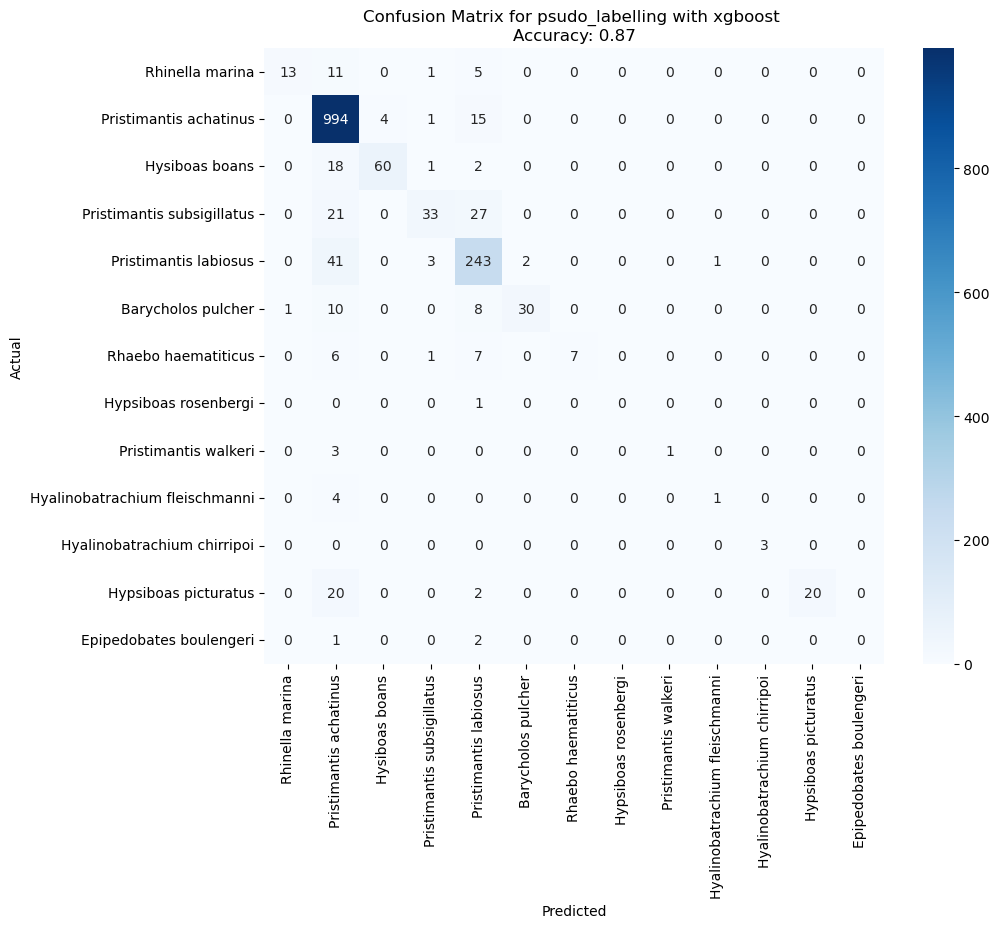

In [71]:
cm= confusion_matrix(y_test, y_pred)
plot_confusion_matrix("psudo_labelling with xgboost",cm,accuracy,class_labels[:len(cm[0])])

In [73]:
for original_label, encoded_label in enumerate(encoder.classes_):
    print(f"Original Label: {encoded_label} -> Encoded Label: {original_label}")

Original Label: 1.0 -> Encoded Label: 0
Original Label: 2.0 -> Encoded Label: 1
Original Label: 3.0 -> Encoded Label: 2
Original Label: 4.0 -> Encoded Label: 3
Original Label: 5.0 -> Encoded Label: 4
Original Label: 6.0 -> Encoded Label: 5
Original Label: 7.0 -> Encoded Label: 6
Original Label: 8.0 -> Encoded Label: 7
Original Label: 10.0 -> Encoded Label: 8
Original Label: 13.0 -> Encoded Label: 9
Original Label: 14.0 -> Encoded Label: 10
Original Label: 15.0 -> Encoded Label: 11
Original Label: 16.0 -> Encoded Label: 12
Original Label: 17.0 -> Encoded Label: 13


In [74]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

resample = Pipeline([
    ('o', SMOTE(sampling_strategy={ # define the classes to oversample
        0: 300,
        2: 500,
        3: 500,
        4: 1500,
        5: 500,
        6: 100,
        7: 10,
        8: 10,
        9: 50,
        10: 60,
        11: 50,
        12: 500,
        13: 50
    },k_neighbors= 2)),
    ('u', RandomUnderSampler(sampling_strategy={ # define the classes to undersample
        1: 1500
    }))
])

X_train_resampled, y_train_resampled = resample.fit_resample(X_train, y_train)
clf = XGBClassifier()
clf.fit(X_train_resampled, y_train_resampled)

# Predict class probabilities on unlabeled data
probs_unlabeled = clf.predict_proba(X_unlabeled)
# Take the max probability for each sample to determine confidence
max_probs = probs_unlabeled.max(axis=1)

# Define a threshold for confident predictions
threshold = 0.9
confident_samples = max_probs > threshold

# Pseudo labeling for confident predictions
pseudo_labels_confident = clf.predict(X_unlabeled[confident_samples])
y_train_series = pd.Series(y_train_resampled)
pseudo_labels_confident_series = pd.Series(pseudo_labels_confident, index=X_unlabeled[confident_samples].index)

# Combine labeled data and confident pseudo-labeled data
X_combined = pd.concat([X_train_resampled, X_unlabeled[confident_samples]])
y_combined = pd.concat([y_train_series, pseudo_labels_confident_series])

# Retrain model on combined data
clf.fit(X_combined, y_combined)

# Prediction & Evaluation
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with confident pseudo-labeling, resampling, and XGBoost: {accuracy:.4f}")

Accuracy with confident pseudo-labeling, resampling, and XGBoost: 0.8633


C:\Users\loges\AppData\Local\Temp\ipykernel_24072\884660844.py:17: RuntimeWarning:

invalid value encountered in divide

C:\Users\loges\AppData\Local\Temp\ipykernel_24072\884660844.py:20: RuntimeWarning:

invalid value encountered in divide




Metrics for each class:
                                Precision    Recall  F1 Score
Rhinella marina                  0.680000  0.566667  0.618182
Pristimantis achatinus           0.942682  0.908284  0.925163
Hysiboas boans                   0.800000  0.790123  0.795031
Pristimantis subsigillatus       0.746269  0.617284  0.675676
Pristimantis labiosus            0.723861  0.931034  0.814480
Barycholos pulcher               0.846154  0.673469  0.750000
Rhaebo haematiticus              1.000000  0.428571  0.600000
Hypsiboas rosenbergi             0.000000  0.000000  0.000000
Pristimantis walkeri             1.000000  0.500000  0.666667
Hyalinobatrachium fleischmanni   1.000000  0.200000  0.333333
Hyalinobatrachium chirripoi      1.000000  1.000000  1.000000
Hypsiboas picturatus             0.666667  0.761905  0.711111
Epipedobates boulengeri          0.000000  0.000000  0.000000


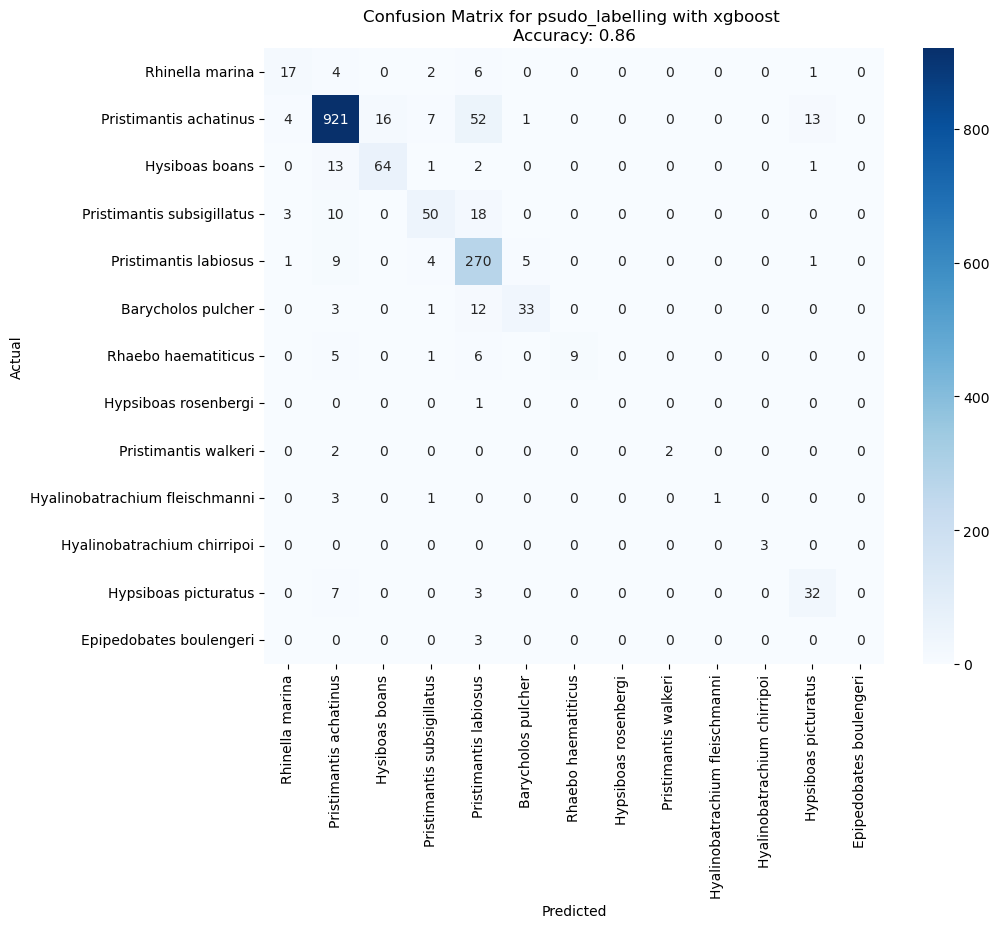

In [75]:
cm= confusion_matrix(y_test, y_pred)
plot_confusion_matrix("psudo_labelling with xgboost",cm,accuracy,class_labels[:len(cm[0])])

In [76]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
# Define hyperparameter search space
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': range(3, 10),
    'min_child_weight': range(1, 6),
    'subsample': np.arange(0.5, 1.0, 0.05),
    'colsample_bytree': np.arange(0.5, 1.0, 0.05),
    'n_estimators': [100, 200, 500, 1000],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

resample = Pipeline([
    ('o', SMOTE(sampling_strategy={ # define the classes to oversample
        0: 300,
        2: 500,
        3: 500,
        4: 1500,
        5: 500,
        6: 100,
        7: 10,
        8: 10,
        9: 50,
        10: 60,
        11: 50,
        12: 500,
        13: 50
    },k_neighbors= 2)),
    ('u', RandomUnderSampler(sampling_strategy={ # define the classes to undersample
        1: 1500
    }))
])

X_train_resampled, y_train_resampled = resample.fit_resample(X_train, y_train)

# Initialize the classifier and RandomizedSearchCV
clf = XGBClassifier()
rs = RandomizedSearchCV(clf, param_distributions=param_dist, scoring='accuracy',
                        n_iter=100, cv=5, verbose=1, random_state=42, n_jobs=-1)

# Fit the model to the resampled data
rs.fit(X_train_resampled, y_train_resampled)

# Get the best estimator from RandomizedSearchCV
best_clf = rs.best_estimator_

# Pseudo-labeling
probs_unlabeled = best_clf.predict_proba(X_unlabeled)
max_probs = probs_unlabeled.max(axis=1)
threshold = 0.9
confident_samples = max_probs > threshold
pseudo_labels_confident = best_clf.predict(X_unlabeled[confident_samples])
y_train_series_resampled = pd.Series(y_train_resampled)
pseudo_labels_confident_series = pd.Series(pseudo_labels_confident, index=X_unlabeled[confident_samples].index)

# Combine resampled labeled data with confident pseudo-labeled data
X_combined = pd.concat([X_train_resampled, X_unlabeled[confident_samples]])
y_combined = pd.concat([y_train_series_resampled, pseudo_labels_confident_series])

# Retrain the model on combined data
best_clf.fit(X_combined, y_combined)

# Evaluation on the test set
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with confident pseudo-labeling, resampling, hyperparameter tuning, and XGBoost: {accuracy:.4f}")

cm= confusion_matrix(y_test, y_pred)
plot_confusion_matrix("psudo_labelling with xgboost",cm,accuracy,class_labels[:len(cm[0])])


Fitting 5 folds for each of 100 candidates, totalling 500 fits


XG with bagging classifier


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


merged_features = merged_features.drop("filename", axis=1)

# Split data into features and labels
X = merged_features.iloc[:, :-2]
y = merged_features.iloc[:, -1]

# Split the data into labeled and unlabeled datasets
X_labeled, X_unlabeled = X[y != -1], X[y == -1]
y_labeled = y[y != -1]


resample = Pipeline([
    ('o', SMOTE(sampling_strategy={ # define the classes to oversample
        1.0: 300,
        3.0: 500,
        4.0: 500,
        5.0: 1500,
        6.0: 500,
        7.0: 100,
        8.0: 10,
        10.0: 10,
        13.0: 50,
        14.0: 60,
        15.0: 50,
        16.0: 500,
        17.0: 50
    },k_neighbors= 2)),
    ('u', RandomUnderSampler(sampling_strategy={ # define the classes to undersample
        2.0: 1500
    }))
])

X_resampled, y_resampled = resample.fit_resample(X_labeled, y_labeled)

# Split labeled data for training and evaluation
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)



# Define the XGBClassifier
clf = xgb.XGBClassifier()

# Train an ensemble model
bagging = BaggingClassifier(clf, n_estimators=10, random_state=42)
bagging.fit(X_train, y_train)

# Predict class probabilities on unlabeled data
probs_unlabeled = bagging.predict_proba(X_unlabeled)
# Take the max probability for each sample to determine confidence
max_probs = probs_unlabeled.max(axis=1)
# Define a threshold for confident predictions
threshold = 0.9
confident_samples = max_probs > threshold

# Pseudo labeling for confident predictions
pseudo_labels_confident = bagging.predict(X_unlabeled[confident_samples])

# Combine labeled data and confident pseudo-labeled data
X_combined = pd.concat([X_train, X_unlabeled[confident_samples]])
y_combined = pd.concat([y_train, pd.Series(pseudo_labels_confident)])

# Retrain model on combined data
bagging.fit(X_combined, y_combined)

# Prediction & Evaluation
y_pred = bagging.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with confident pseudo-labeling and ensemble: {accuracy:.4f}")


Accuracy with confident pseudo-labeling and ensemble: 0.8499


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix 
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[ 54   8   1   2   7   0   0   0   0   0   0   0   0   0]
 [  2 273   5   2  21   2   0   0   0   1   0   0   6   0]
 [  0   4  80   0   5   0   0   0   0   0   0   0   2   0]
 [  0  16   0  63  27   1   0   0   0   0   0   0   0   0]
 [  1   7   0   2 261   7   0   0   0   0   0   0   2   0]
 [  0   5   0   0   3 114   0   0   0   0   0   0   0   0]
 [  0   1   0   1   2   0  12   0   0   0   0   0   0   0]
 [  0   1   0   0   1   0   0   2   0   0   0   0   0   0]
 [  0   0   0   1   1   0   0   0   1   0   0   0   0   0]
 [  0   1   1   1   1   0   0   0   0   9   0   0   0   0]
 [  0   3   0   0   0   0   0   0   0   0   5   0   0   0]
 [  0   0   0   0   3   0   0   0   0   0   0   7   0   0]
 [  0   5   0   1   4   0   0   0   0   0   0   0  69   0]
 [  0   2   0   0   0   0   0   0   0   0   0   0   0   7]]


['Rhinella marina',
 'Pristimantis achatinus',
 'Hysiboas boans',
 'Pristimantis subsigillatus',
 'Pristimantis labiosus',
 'Barycholos pulcher',
 'Rhaebo haematiticus',
 'Hypsiboas rosenbergi',
 'Pristimantis walkeri',
 'Hyalinobatrachium fleischmanni',
 'Hyalinobatrachium chirripoi',
 'Hypsiboas picturatus',
 'Epipedobates boulengeri',
 'Hyloxalus toachi']

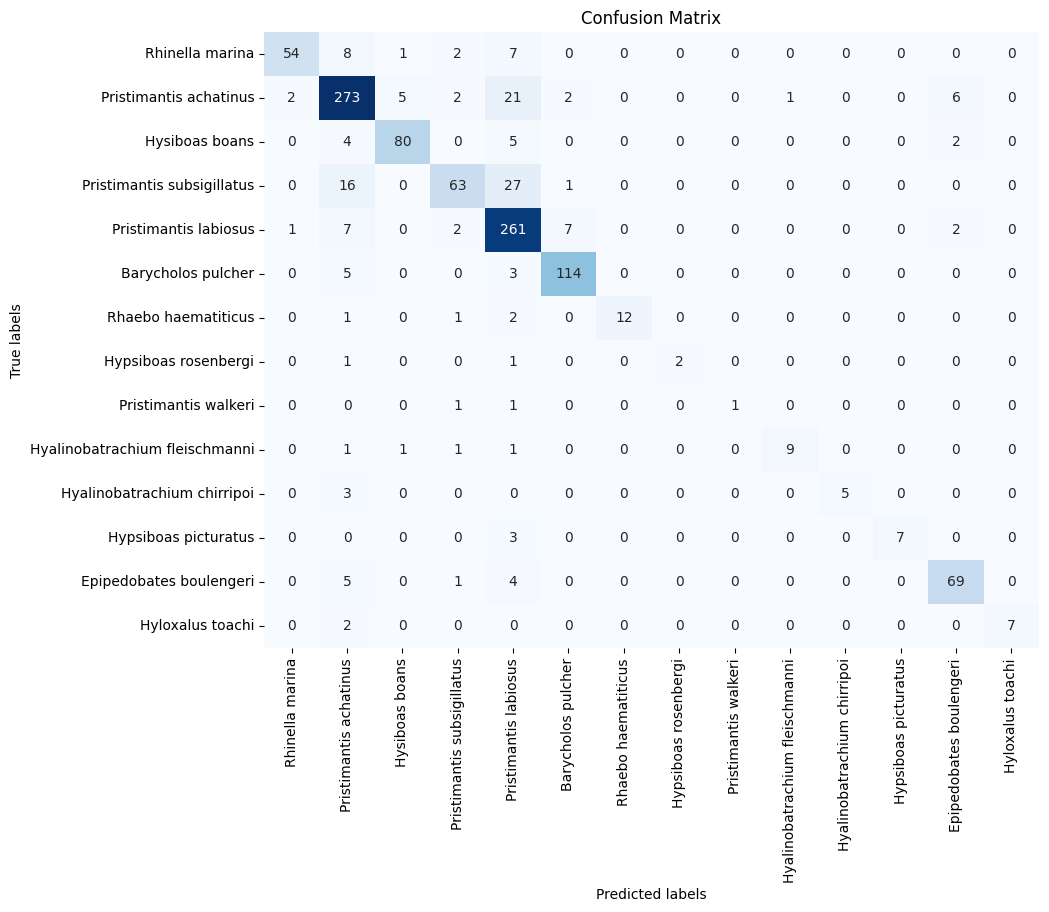

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import numpy as np
accuracy = np.trace(cm) / np.sum(cm)
print(f"Overall Accuracy: {accuracy:.2f}")

# Calculate precision, recall and F1 for each class
num_classes= len(class_labels)
for c in range(num_classes):
    true_positive = cm[c, c]
    false_positive = np.sum(cm[:, c]) - true_positive
    false_negative = np.sum(cm[c, :]) - true_positive

    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    
    print(f"Class {class_labels[c]}: Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

Overall Accuracy: 0.85
Class Rhinella marina: Precision: 0.95, Recall: 0.75, F1 Score: 0.84
Class Pristimantis achatinus: Precision: 0.84, Recall: 0.88, F1 Score: 0.86
Class Hysiboas boans: Precision: 0.92, Recall: 0.88, F1 Score: 0.90
Class Pristimantis subsigillatus: Precision: 0.86, Recall: 0.59, F1 Score: 0.70
Class Pristimantis labiosus: Precision: 0.78, Recall: 0.93, F1 Score: 0.85
Class Barycholos pulcher: Precision: 0.92, Recall: 0.93, F1 Score: 0.93
Class Rhaebo haematiticus: Precision: 1.00, Recall: 0.75, F1 Score: 0.86
Class Hypsiboas rosenbergi: Precision: 1.00, Recall: 0.50, F1 Score: 0.67
Class Pristimantis walkeri: Precision: 1.00, Recall: 0.33, F1 Score: 0.50
Class Hyalinobatrachium fleischmanni: Precision: 0.90, Recall: 0.69, F1 Score: 0.78
Class Hyalinobatrachium chirripoi: Precision: 1.00, Recall: 0.62, F1 Score: 0.77
Class Hypsiboas picturatus: Precision: 1.00, Recall: 0.70, F1 Score: 0.82
Class Epipedobates boulengeri: Precision: 0.87, Recall: 0.87, F1 Score: 0.87


In [ ]:
# import umap
# import matplotlib.pyplot as plt
# import numpy as np
# # Assuming X_combined and y_combined from your earlier code which combines the labeled and pseudo-labeled data
# reducer = umap.UMAP()

# # Perform UMAP dimensionality reduction
# embedding = reducer.fit_transform(X_combined)

# # Plotting
# plt.figure(figsize=(10, 8))
# plt.scatter(embedding[:, 0], embedding[:, 1], c=y_combined, cmap='Spectral', s=5)
# plt.colorbar(boundaries=np.arange(len(y_combined.unique())+1)-0.5).set_ticks(np.arange(len(y_combined.unique())))
# plt.title('UMAP projection of the dataset', fontsize=24)
# plt.show()


  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   --------------------------------------- 235.6/235.6 kB 14.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

merged_features = merged_features.drop("filename", axis=1)

# Split data into features and labels
X = merged_features.iloc[:, :-2]
y = merged_features.iloc[:, -1]

# Split the data into labeled and unlabeled datasets
X_labeled, X_unlabeled = X[y != -1], X[y == -1]
y_labeled = y[y != -1]

# Split labeled data for training and evaluation
X_train, X_test, y_train, y_test = train_test_split(X_labeled, y_labeled, test_size=0.2, random_state=42)

clf = xgb.XGBClassifier()
threshold = 0.7
num_iterations = 5  # Define how many times you want to iterate

for _ in range(num_iterations):
    clf.fit(X_train, y_train)
    
    # Predict class probabilities on unlabeled data
    probs_unlabeled = clf.predict_proba(X_unlabeled)
    
    # Take the max probability for each sample to determine confidence
    max_probs = probs_unlabeled.max(axis=1)
    confident_samples = max_probs > threshold
    
    # Pseudo labeling for confident predictions
    pseudo_labels_confident = clf.predict(X_unlabeled[confident_samples])
    
    # Update the training set with the confident pseudo-labeled samples
    X_train = pd.concat([X_train, X_unlabeled[confident_samples]])
    y_train = pd.concat([y_train, pd.Series(pseudo_labels_confident)])
    
    # Remove these samples from the unlabeled data so they are not considered in the next iteration
    X_unlabeled = X_unlabeled[~confident_samples]
    

# Prediction & Evaluation after all iterations
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with iterative confident pseudo-labeling: {accuracy:.4f}")


In [ ]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelSpreading
from sklearn.metrics import accuracy_score

merged_features.drop("filename" , axis=1)
# Split data into features and labels
X = merged_features.iloc[:, :-2]
y = merged_features.iloc[:, -1]
print(X)
# Split the data into labeled and unlabeled datasets
X_labeled = X[y != -1]
y_labeled = y[y != -1]

X_unlabeled = X[y == -1]
y_unlabeled = y[y == -1]

# Split labeled data for training and evaluation (you can skip this if you don't have true labels for unlabeled data)
X_train, X_test, y_train, y_test = train_test_split(X_labeled, y_labeled, test_size=0.2, random_state=42)

# Combine back the training data
X_train_combined = pd.concat([X_train, X_unlabeled])
y_train_combined = pd.concat([y_train, y_unlabeled])

# Create and train the LabelSpreading model
model = LabelSpreading(kernel='knn', n_neighbors=7)
model.fit(X_train_combined, y_train_combined)

# Predict the labels of the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


       min_y  min_x  max_y  max_x   shp_001   shp_002   shp_003   shp_004  \
0         20   4058     96   4979  0.171679  0.192506  0.157831  0.194410   
1         21   5435     73   5511  0.188214  0.208186  0.168917  0.214462   
2         23   5061    104   5260  0.171349  0.190693  0.156810  0.194360   
3         28   3969     31   3997  0.163360  0.177341  0.150718  0.188606   
4         48   3963     95   4006  0.215527  0.237419  0.218468  0.255196   
...      ...    ...    ...    ...       ...       ...       ...       ...   
24646     73     75     85    109  0.439661  0.465277  0.442292  0.448074   
24647     73    239     83    269  0.500720  0.538685  0.500890  0.523335   
24648     73    362     84    395  0.508908  0.515588  0.478962  0.487879   
24649     73   5483     84   5517  0.341203  0.395338  0.370483  0.401012   
24650     73   5555     82   5574  0.359288  0.350985  0.387946  0.377771   

        shp_005   shp_006  ...        snr  duration_x  bandwidth_y  area_xy

c:\Users\lv228\OneDrive - University of Sussex\Desktop\workspace\.venv\Lib\site-packages\sklearn\semi_supervised\_label_propagation.py:230: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



# Split the data into labeled and unlabeled datasets
X_labeled = X[y != -1]
y_labeled = y[y != -1]

X_unlabeled = X[y == -1]

# 1. Train a model on the labeled data
clf = RandomForestClassifier()
clf.fit(X_labeled, y_labeled)

# 2. Predict pseudo-labels for the unlabeled data
y_pseudo = clf.predict(X_unlabeled)

# 3. Combine the labeled data with the pseudo-labeled data
X_combined = pd.concat([X_labeled, X_unlabeled])
y_combined = pd.concat([y_labeled, pd.Series(y_pseudo, index=X_unlabeled.index)])

# 4. Re-train the model on the combined data
clf.fit(X_combined, y_combined)

# If you have a separate test set, you can evaluate the model on that:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after pseudo-labeling: {accuracy:.4f}")


Accuracy after pseudo-labeling: 1.0000


In [ ]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelPropagation  # <- Importing LabelPropagation
from sklearn.metrics import accuracy_score, confusion_matrix  # <- Importing necessary functions
import matplotlib.pyplot as plt 

merged_features = merged_features.drop("filename", axis=1)

# Split data into features and labels
X = merged_features.iloc[:, :-2]
y = merged_features.iloc[:, -1]

# Split the data into labeled and unlabeled datasets
X_labeled = X[y != -1]
y_labeled = y[y != -1]

X_unlabeled = X[y == -1]
y_unlabeled = y[y == -1]

# Split labeled data for training and evaluation (you can skip this if you don't have true labels for unlabeled data)
X_train, X_test, y_train, y_test = train_test_split(X_labeled, y_labeled, test_size=0.2, random_state=42)

# Combine back the training data
X_train_combined = pd.concat([X_train, X_unlabeled])
y_train_combined = pd.concat([y_train, y_unlabeled])

# Create and train the LabelPropagation model
model = LabelPropagation(kernel='knn', n_neighbors=7)  # <- Using LabelPropagation
model.fit(X_train_combined, y_train_combined)

# Predict the labels of the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.6970


c:\Users\lv228\OneDrive - University of Sussex\Desktop\workspace\.venv\Lib\site-packages\sklearn\semi_supervised\_label_propagation.py:322: ConvergenceWarning: max_iter=1000 was reached without convergence.
  warnings.warn(


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[  8  11   1   0  10   0   0   0   0   0   0   0   0]
 [  7 920  20  10  40  11   2   0   0   1   0   3   0]
 [  1  49  28   1   1   0   0   0   0   1   0   0   0]
 [  0  34   3  13  26   1   1   0   0   2   0   1   0]
 [  1 114   5  13 147   3   6   0   0   0   0   0   1]
 [  0  33   1   1   4  10   0   0   0   0   0   0   0]
 [  1   4   1   0  13   0   2   0   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0   0   0   0   0   0]
 [  0   2   2   0   0   0   0   0   0   0   0   0   0]
 [  0   5   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   3   0   0   0   0   0   0   0   0]
 [  0  35   0   0   3   0   0   0   0   0   0   4   0]
 [  0   1   0   0   1   1   0   0   0   0   0   0   0]]


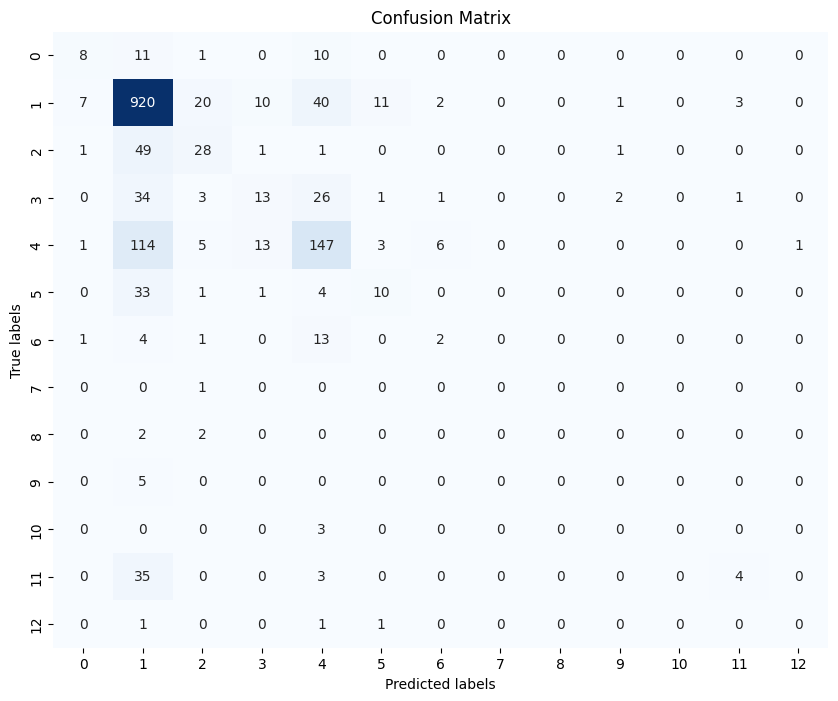

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import numpy as np
accuracy = np.trace(cm) / np.sum(cm)
print(f"Overall Accuracy: {accuracy:.2f}")

# Calculate precision, recall and F1 for each class
num_classes = cm.shape[0]
for c in range(num_classes):
    true_positive = cm[c, c]
    false_positive = np.sum(cm[:, c]) - true_positive
    false_negative = np.sum(cm[c, :]) - true_positive

    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    
    print(f"Class {c}: Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

Overall Accuracy: 0.70
Class 0: Precision: 0.44, Recall: 0.27, F1 Score: 0.33
Class 1: Precision: 0.76, Recall: 0.91, F1 Score: 0.83
Class 2: Precision: 0.45, Recall: 0.35, F1 Score: 0.39
Class 3: Precision: 0.34, Recall: 0.16, F1 Score: 0.22
Class 4: Precision: 0.59, Recall: 0.51, F1 Score: 0.55
Class 5: Precision: 0.38, Recall: 0.20, F1 Score: 0.27
Class 6: Precision: 0.18, Recall: 0.10, F1 Score: 0.12
Class 7: Precision: nan, Recall: 0.00, F1 Score: nan
Class 8: Precision: nan, Recall: 0.00, F1 Score: nan
Class 9: Precision: 0.00, Recall: 0.00, F1 Score: 0.00
Class 10: Precision: nan, Recall: 0.00, F1 Score: nan
Class 11: Precision: 0.50, Recall: 0.10, F1 Score: 0.16
Class 12: Precision: 0.00, Recall: 0.00, F1 Score: 0.00


C:\Users\lv228\AppData\Local\Temp\ipykernel_30744\2039009786.py:12: RuntimeWarning: invalid value encountered in scalar divide
  precision = true_positive / (true_positive + false_positive)


In [ ]:
merged_features = final_df.merge(filtered_df, on='filename', how='left')
merged_features = merged_features.rename (columns = { 0 :"label"})
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Assuming merged_features has already been read and available
merged_features = merged_features.drop("filename", axis=1)

# Split data into features and labels
X = merged_features.iloc[:, :-2]
y = merged_features.iloc[:, -1]

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
print(list(zip(encoder.classes_, range(len(encoder.classes_)))))

unique, counts = np.unique(y_encoded, return_counts=True)
value_counts = dict(zip(unique, counts))
print(value_counts)


# Split the data into labeled and unlabeled datasets
X_labeled, X_unlabeled = X[y_encoded != 14], X[y_encoded == 14]
y_labeled = y_encoded[y_encoded != 14]

# Split labeled data for training and evaluation
X_train, X_test, y_train, y_test = train_test_split(X_labeled, y_labeled, test_size=0.2, random_state=42)

# Prepare data for DMatrix
# weight_mapping = {
#     -1.0: 1,
#      2.0: 16534/5166,
#      5.0: 16534/1420,
#      4.0: 16534/414,
#      3.0: 16534/396,
#     16.0: 16534/215,
#      6.0: 16534/194,
#      1.0: 16534/155,
#      7.0: 16534/75,
#     14.0: 16534/30,
#     13.0: 16534/18,
#     15.0: 16534/15,
#     17.0: 16534/12,
#      8.0: 16534/4,
#     10.0: 16534/3
# }
# weights = y_train.map(weight_mapping).values

# dtrain = xgb.DMatrix(X_train, label=y_train, weight=weights)
# dtest = xgb.DMatrix(X_test, label=y_test)
# objective="multi:softprob", num_class=len(y.unique())
# Define the XGBClassifier
clf = xgb.XGBClassifier(objective="multi:softprob")

# Train XGBClassifier
clf.fit(X_train, y_train, eval_metric='mlogloss', eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=True)
print(len(X_unlabeled))
# Predict class probabilities on unlabeled data
probs_unlabeled = clf.predict_proba(X_unlabeled)
print("dingn")
print(len(probs_unlabeled))
# Take the max probability for each sample to determine confidence
max_probs = probs_unlabeled.max(axis=1)

# Define a threshold for confident predictions
threshold = 1.00
confident_samples = max_probs > threshold
print("ddd")

print(len(confident_samples))
# Pseudo labeling for confident predictions
pseudo_labels_confident = clf.predict(X_unlabeled[confident_samples])


# Combine labeled data and confident pseudo-labeled data
X_combined = pd.concat([X_train, X_unlabeled[confident_samples]])
y_combined = pd.concat([y_train, pd.Series(pseudo_labels_confident)])

# Retrain model on combined data
clf.fit(X_combined, y_combined, eval_metric='mlogloss', eval_set=[(X_test, y_test)], early_stopping_rounds=10, verbose=True)

# Prediction & Evaluation
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with confident pseudo-labeling: {accuracy:.4f}")


[(1.0, 0), (2.0, 1), (3.0, 2), (4.0, 3), (5.0, 4), (6.0, 5), (7.0, 6), (8.0, 7), (10.0, 8), (13.0, 9), (14.0, 10), (15.0, 11), (16.0, 12), (17.0, 13), (nan, 14)]
{0: 155, 1: 5166, 2: 396, 3: 414, 4: 1420, 5: 194, 6: 75, 7: 4, 8: 3, 9: 18, 10: 30, 11: 15, 12: 215, 13: 12, 14: 16534}
[0]	validation_0-mlogloss:1.53109


c:\Users\lv228\OneDrive - University of Sussex\Desktop\workspace\.venv\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\lv228\OneDrive - University of Sussex\Desktop\workspace\.venv\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-mlogloss:1.24301
[2]	validation_0-mlogloss:1.05617
[3]	validation_0-mlogloss:0.92485
[4]	validation_0-mlogloss:0.82426
[5]	validation_0-mlogloss:0.75029
[6]	validation_0-mlogloss:0.69351
[7]	validation_0-mlogloss:0.64910
[8]	validation_0-mlogloss:0.61357
[9]	validation_0-mlogloss:0.58389
[10]	validation_0-mlogloss:0.56236
[11]	validation_0-mlogloss:0.54014
[12]	validation_0-mlogloss:0.52654
[13]	validation_0-mlogloss:0.51391
[14]	validation_0-mlogloss:0.50432
[15]	validation_0-mlogloss:0.49500
[16]	validation_0-mlogloss:0.48896
[17]	validation_0-mlogloss:0.48354
[18]	validation_0-mlogloss:0.47763
[19]	validation_0-mlogloss:0.47323
[20]	validation_0-mlogloss:0.46986
[21]	validation_0-mlogloss:0.46623
[22]	validation_0-mlogloss:0.46349
[23]	validation_0-mlogloss:0.46177
[24]	validation_0-mlogloss:0.46063
[25]	validation_0-mlogloss:0.45785
[26]	validation_0-mlogloss:0.45521
[27]	validation_0-mlogloss:0.45407
[28]	validation_0-mlogloss:0.45236
[29]	validation_0-mlogloss:0.

ValueError: attempt to get argmax of an empty sequence